In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [187]:
ds_train=pd.read_csv('train.csv')
ds_test=pd.read_csv('test.csv')

In [188]:
df_train=pd.DataFrame(ds_train)
df_test=pd.DataFrame(ds_test)

In [189]:
df_train.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [190]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [191]:
df_train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [192]:
df_train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [193]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [194]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


NoNull values in this dataset

In [195]:
df_malignant = df_train.drop(['id', 'comment_text'], axis=1)
# calculating total count of each category comments
counts = []
categories = list(df_malignant.columns.values)
for i in categories:
    counts.append((i, df_malignant[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'count'])
df_stats

,category,count
0,malignant,15294
1,highly_malignant,1595
2,rude,8449
3,threat,478
4,abuse,7877
5,loathe,1405


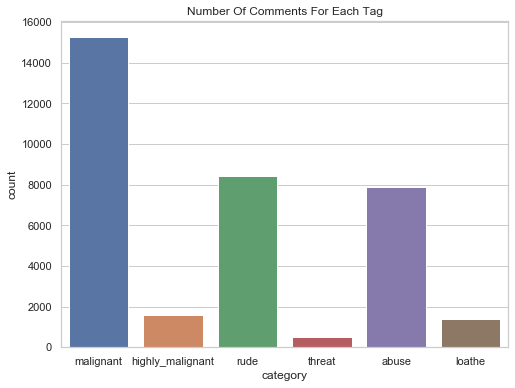

In [196]:
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x='category', y='count', data=df_stats)
plt.title("Number Of Comments For Each Tag")
plt.show()

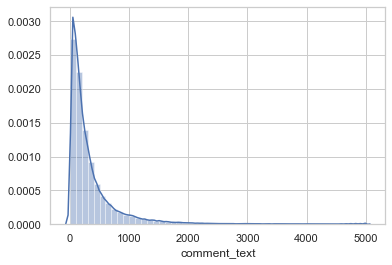

In [197]:
#length of comment
length=df_train['comment_text'].str.len()
sns.distplot(length)

This indicates that most of the comments are of lengths less than 500, while some are of length 5000 as well.

In [198]:
comments = df_train['comment_text'].str.lower()

def clean_comments(comment):
  tokens = word_tokenize(comment)
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  tokens = [w for w in tokens if w.isalpha()]
  tokens = ' '.join(tokens)
  return tokens


def process_comments(comment):
  clean_c = []
  for c in comment:
    c = str(c)
    c = clean_comments(c)
    clean_c.append(c)
  return clean_c

comments_clean = process_comments(comments)


In [199]:
comments_clean[1]

'matches background colour seemingly stuck thanks talk january utc'

In [200]:
train.shape

(106912, 8)

In [201]:
df_train['comment_text']=comments_clean

In [202]:
df_train['comment_text'].shape

(159571,)

In [203]:
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


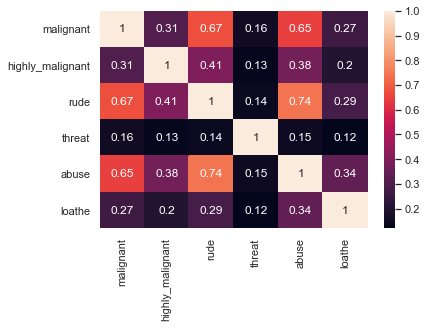

In [204]:
sns.heatmap(train.corr(),annot=True)

In [205]:
#cleaning test data
comments = df_test['comment_text'].str.lower()

def clean_comments(comment):
  tokens = word_tokenize(comment)
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  tokens = [w for w in tokens if w.isalpha()]
  tokens = ' '.join(tokens)
  return tokens


def process_comments(comment):
  clean_c = []
  for c in comment:
    c = str(c)
    c = clean_comments(c)
    clean_c.append(c)
  return clean_c

comments_clean = process_comments(comments)


In [206]:
len(df_test['comment_text'][1])

50

In [207]:
df_test['comment_text'][1]

'== From RfC == \n\n The title is fine as it is, IMO.'

In [209]:
comments_clean[1]

'rfc title fine imo'

In [210]:
df_test['comment_text']=comments_clean

In [230]:
#feature Enginerring
from sklearn.model_selection import train_test_split
labels=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
train, test = train_test_split(df_train, test_size=0.33, random_state=42, shuffle=True)


In [231]:
train.shape,test.shape

((106912, 8), (52659, 8))

In [232]:
X_train = train['comment_text']
X_test = test['comment_text']

In [233]:
X_train.shape,X_test.shape

((106912,), (52659,))

# Machine Learning Model

In [234]:
accuracies=[[],[],[]]

In [235]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cvec = CountVectorizer()
tvec = TfidfTransformer()
model1 = MultinomialNB()

In [236]:
X_train = tvec.fit_transform(cvec.fit_transform(X_train))
X_test = tvec.transform(cvec.transform(X_test))

In [237]:
X_train.shape, X_test.shape

((106912, 125086), (52659, 125086))

In [238]:
for category in labels:
    model1.fit(X_train, train[category])
    accuracy = model1.score(X_test, test[category])
    accuracies[0].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 92.2%
Accuracy For highly_malignant Class Is 99.0%
Accuracy For rude Class Is 95.28%
Accuracy For threat Class Is 99.71%
Accuracy For abuse Class Is 95.23%
Accuracy For loathe Class Is 99.1%


In [239]:
#LinearSVC
from sklearn.svm import LinearSVC
model2 = LinearSVC()
for category in labels:
    model2.fit(X_train, train[category])
    accuracy = model2.score(X_test, test[category])
    accuracies[1].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 95.97%
Accuracy For highly_malignant Class Is 99.05%
Accuracy For rude Class Is 97.81%
Accuracy For threat Class Is 99.76%
Accuracy For abuse Class Is 97.05%
Accuracy For loathe Class Is 99.22%


In [240]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(n_jobs=1, solver='liblinear')
for category in labels:
    model3.fit(X_train, train[category])
    accuracy = model3.score(X_test, test[category])
    accuracies[2].append(accuracy)
    print("Accuracy For {0} Class Is {1}%".format(category,round(accuracy*100,2)))

Accuracy For malignant Class Is 95.46%
Accuracy For highly_malignant Class Is 99.08%
Accuracy For rude Class Is 97.57%
Accuracy For threat Class Is 99.74%
Accuracy For abuse Class Is 96.89%
Accuracy For loathe Class Is 99.19%


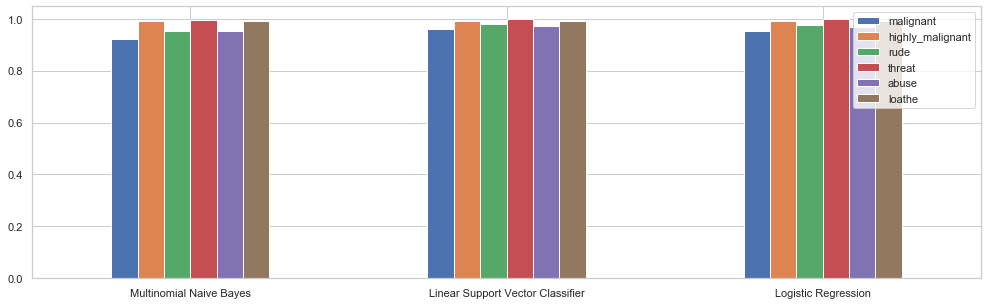

In [242]:
accuracies =pd.DataFrame(accuracies)
fig = accuracies.plot.bar(figsize=(17, 5), grid=True)
plt.xticks(np.arange(3),('Multinomial Naive Bayes','Linear Support Vector Classifier','Logistic Regression'),rotation=0)
plt.legend(labels)
plt.show()

In [243]:
for i in range(3):
    print("Model -",i+1,"... Aggregate Accuracy -",np.mean(accuracies.iloc[i,:]))

Model - 1 ... Aggregate Accuracy - 0.9675300834931667
Model - 2 ... Aggregate Accuracy - 0.9814150161099401
Model - 3 ... Aggregate Accuracy - 0.9798799825291024


In this dataset the linearSVC model is performing well so we select the SVC model for the further testing

In [245]:
df_test.shape,df_train.shape

((153164, 2), (159571, 8))

# Testing

In [251]:
labels=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
X_train=df_train['comment_text']
X_test=df_test['comment_text']
#vectorisation
X_train = tvec.fit_transform(cvec.fit_transform(X_train))
X_test = tvec.transform(cvec.transform(X_test))

In [255]:
X_train

<159571x156924 sparse matrix of type '<class 'numpy.float64'>'
	with 4170471 stored elements in Compressed Sparse Row format>

In [265]:
Y_test=df_train[['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']]

In [269]:
Y_test['malignant']

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: malignant, Length: 159571, dtype: int64

In [272]:
from sklearn.svm import LinearSVC
model = LinearSVC()
predictions = []
for cat in labels:
    model.fit(X_train, df_train[cat]) #fitting the model
    y_pred = model.predict(X_test).tolist() #np array of predictions to list
    
    predictions.append(y_pred)
    

In [274]:
test_result_mb = pd.DataFrame({'id':df_test['id'],'malignant':predictions[0],'highly_malignant':predictions[1],'rude':predictions[2],'threat':predictions[3],'abuse':predictions[4],'loathe':predictions[5]})

In [275]:
test_result.head()

,id,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,1,0,0,0,0,0
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,0,0,0,0,0,0
3,00017563c3f7919a,0,0,0,0,0,0
4,00017695ad8997eb,0,0,0,0,0,0


In [276]:
test_result.to_csv('prediction_comment.csv')